In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv("test_lAUu6dG.csv")
ans=pd.read_csv("sample_submission.csv")
full_data=[train,test]

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

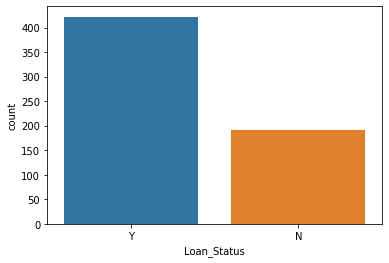

In [5]:
sns.countplot(train["Loan_Status"])

In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
for dataset in full_data:
    dataset["Gender"]=dataset["Gender"].fillna(dataset["Gender"].dropna().mode().values[0])
    dataset["Dependents"]=dataset["Dependents"].fillna(dataset["Dependents"].dropna().mode().values[0])
    dataset["Self_Employed"]=dataset["Self_Employed"].fillna(dataset["Self_Employed"].dropna().mode().values[0])
    dataset["LoanAmount"]=dataset["LoanAmount"].fillna(dataset["LoanAmount"].dropna().mode().values[0])
    dataset["Loan_Amount_Term"]=dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].dropna().mean())
    dataset["Credit_History"]=dataset["Credit_History"].fillna(dataset["Credit_History"].dropna().mode().values[0])
    dataset["Married"]=dataset["Married"].fillna(dataset["Married"].dropna().mode().values[0])
    

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [10]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for dataset in full_data:
    dataset['Gender'] = le.fit_transform(dataset['Gender'])
    dataset['Married'] = le.fit_transform(dataset['Married'])
    dataset["Education"]=dataset["Education"].map({'Not Graduate':0,'Graduate':1})
    dataset['Self_Employed'] = le.fit_transform(dataset['Self_Employed'])
    dataset['Property_Area'] = le.fit_transform(dataset['Property_Area'])
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

    

In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [12]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [13]:
y=train['Loan_Status']
#making dataframe
ans=[]
ans = pd.DataFrame(ans)
ans['Loan_ID']=test['Loan_ID']

In [14]:
train=train.drop(['Loan_ID'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

train=train.replace('3+',3).astype(np.int)
test=test.replace('3+',3).astype(np.int)

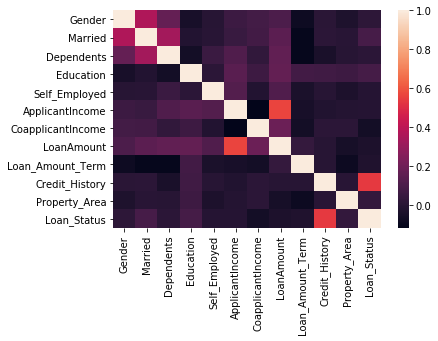

In [15]:
# Correlation Matrix
import seaborn as sns
corr=train.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

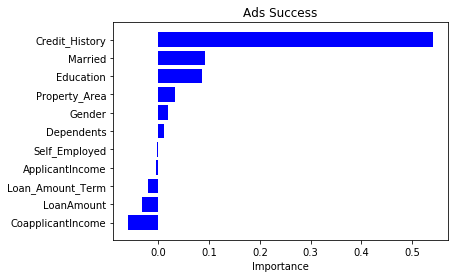

In [16]:
# Filter Method For Feature Selection
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression
importance = train.drop(['Loan_Status'],axis=1).apply(lambda x:x.corr(train.Loan_Status))
index=np.argsort(importance)
names = train.columns.drop(['Loan_Status'])
plt.title("Ads Success")
plt.barh(range(len(index)), importance[index],color='b',align='center')
plt.xlabel('Importance')
plt.yticks(range(len(index)), [names[i] for i in index])
plt.show()

In [17]:
test=test.drop(['ApplicantIncome','Self_Employed','Dependents'],axis=1)
train=train.drop(['Loan_Status','ApplicantIncome','Self_Employed','Dependents'],axis=1)

In [18]:
train.head(10)

,Gender,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,1,0,120,360,1,2
1,1,1,1,1508,128,360,1,0
2,1,1,1,0,66,360,1,2
3,1,1,0,2358,120,360,1,2
4,1,0,1,0,141,360,1,2
5,1,1,1,4196,267,360,1,2
6,1,1,0,1516,95,360,1,2
7,1,1,1,2504,158,360,0,1
8,1,1,1,1526,168,360,1,2
9,1,1,1,10968,349,360,1,1


In [19]:
test.tail()

,Gender,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,1,1,0,1777,113,360,1,2
363,1,1,1,709,115,360,1,2
364,1,0,1,1993,126,360,1,1
365,1,1,1,2393,158,360,1,0
366,1,0,1,0,98,180,1,0


In [20]:
#Splitting dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=0)

In [22]:
# #Classifier comparison
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, log_loss
# import seaborn as sns
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(probability=True),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     GaussianNB(),
#     LogisticRegression(),XGBClassifier()]


# log_cols = ["Classifier", "Accuracy"]
# log  = pd.DataFrame(columns=log_cols)


# acc_dict = {}

     
# for clf in classifiers:
#     name = clf.__class__.__name__
#     clf.fit(X_train, y_train)
#     train_predictions = clf.predict(X_test)
#     acc = accuracy_score(y_test, train_predictions)
#     if name in acc_dict:
#         acc_dict[name] += acc
#     else:
#         acc_dict[name] = acc
# for clf in acc_dict:
#     acc_dict[clf] = acc_dict[clf] / 10.0
#     log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
#     log = log.append(log_entry)

# plt.xlabel('Accuracy')
# plt.title('Classifier Accuracy')

# sns.set_color_codes("muted")
# sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [23]:
# from xgboost import XGBClassifier
# classifier=XGBClassifier()
# classifier.fit(X_train,y_train)

In [24]:
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)

Learning rate set to 0.007604
0:	learn: 0.6893874	total: 214ms	remaining: 3m 33s
1:	learn: 0.6858222	total: 217ms	remaining: 1m 48s
2:	learn: 0.6820670	total: 221ms	remaining: 1m 13s
3:	learn: 0.6786519	total: 222ms	remaining: 55.4s
4:	learn: 0.6750781	total: 227ms	remaining: 45.1s
5:	learn: 0.6716531	total: 230ms	remaining: 38.1s
6:	learn: 0.6681273	total: 234ms	remaining: 33.2s
7:	learn: 0.6646349	total: 236ms	remaining: 29.2s
8:	learn: 0.6613913	total: 238ms	remaining: 26.2s
9:	learn: 0.6582371	total: 239ms	remaining: 23.7s
10:	learn: 0.6548066	total: 242ms	remaining: 21.7s
11:	learn: 0.6514065	total: 244ms	remaining: 20.1s
12:	learn: 0.6483766	total: 244ms	remaining: 18.6s
13:	learn: 0.6451286	total: 246ms	remaining: 17.3s
14:	learn: 0.6418306	total: 247ms	remaining: 16.2s
15:	learn: 0.6389220	total: 247ms	remaining: 15.2s
16:	learn: 0.6356137	total: 249ms	remaining: 14.4s
17:	learn: 0.6326757	total: 250ms	remaining: 13.6s
18:	learn: 0.6293204	total: 251ms	remaining: 12.9s
19:	lear

225:	learn: 0.4307557	total: 399ms	remaining: 1.37s
226:	learn: 0.4304207	total: 400ms	remaining: 1.36s
227:	learn: 0.4301475	total: 401ms	remaining: 1.36s
228:	learn: 0.4299738	total: 406ms	remaining: 1.37s
229:	learn: 0.4298138	total: 407ms	remaining: 1.36s
230:	learn: 0.4296193	total: 408ms	remaining: 1.36s
231:	learn: 0.4293962	total: 414ms	remaining: 1.37s
232:	learn: 0.4292462	total: 414ms	remaining: 1.36s
233:	learn: 0.4287362	total: 415ms	remaining: 1.36s
234:	learn: 0.4285973	total: 421ms	remaining: 1.37s
235:	learn: 0.4283378	total: 423ms	remaining: 1.37s
236:	learn: 0.4278766	total: 424ms	remaining: 1.36s
237:	learn: 0.4277765	total: 427ms	remaining: 1.36s
238:	learn: 0.4274803	total: 427ms	remaining: 1.36s
239:	learn: 0.4272328	total: 429ms	remaining: 1.36s
240:	learn: 0.4269563	total: 430ms	remaining: 1.35s
241:	learn: 0.4267359	total: 431ms	remaining: 1.35s
242:	learn: 0.4263850	total: 432ms	remaining: 1.34s
243:	learn: 0.4261458	total: 433ms	remaining: 1.34s
244:	learn: 

430:	learn: 0.3840047	total: 584ms	remaining: 772ms
431:	learn: 0.3838771	total: 586ms	remaining: 770ms
432:	learn: 0.3835674	total: 587ms	remaining: 768ms
433:	learn: 0.3833402	total: 588ms	remaining: 767ms
434:	learn: 0.3833372	total: 588ms	remaining: 764ms
435:	learn: 0.3831186	total: 589ms	remaining: 762ms
436:	learn: 0.3829422	total: 590ms	remaining: 760ms
437:	learn: 0.3829243	total: 590ms	remaining: 757ms
438:	learn: 0.3827897	total: 591ms	remaining: 755ms
439:	learn: 0.3826844	total: 591ms	remaining: 753ms
440:	learn: 0.3826172	total: 592ms	remaining: 751ms
441:	learn: 0.3824611	total: 593ms	remaining: 749ms
442:	learn: 0.3822609	total: 594ms	remaining: 747ms
443:	learn: 0.3820813	total: 595ms	remaining: 745ms
444:	learn: 0.3817431	total: 596ms	remaining: 743ms
445:	learn: 0.3815789	total: 596ms	remaining: 741ms
446:	learn: 0.3813779	total: 597ms	remaining: 739ms
447:	learn: 0.3812544	total: 598ms	remaining: 737ms
448:	learn: 0.3810487	total: 599ms	remaining: 735ms
449:	learn: 

646:	learn: 0.3494697	total: 772ms	remaining: 421ms
647:	learn: 0.3494407	total: 776ms	remaining: 422ms
648:	learn: 0.3492694	total: 777ms	remaining: 420ms
649:	learn: 0.3491023	total: 778ms	remaining: 419ms
650:	learn: 0.3490545	total: 779ms	remaining: 418ms
651:	learn: 0.3489945	total: 780ms	remaining: 416ms
652:	learn: 0.3489294	total: 780ms	remaining: 415ms
653:	learn: 0.3488489	total: 781ms	remaining: 413ms
654:	learn: 0.3487625	total: 782ms	remaining: 412ms
655:	learn: 0.3485942	total: 782ms	remaining: 410ms
656:	learn: 0.3485433	total: 783ms	remaining: 409ms
657:	learn: 0.3483422	total: 784ms	remaining: 407ms
658:	learn: 0.3480389	total: 784ms	remaining: 406ms
659:	learn: 0.3479138	total: 785ms	remaining: 404ms
660:	learn: 0.3478035	total: 786ms	remaining: 403ms
661:	learn: 0.3477825	total: 787ms	remaining: 402ms
662:	learn: 0.3476000	total: 788ms	remaining: 400ms
663:	learn: 0.3475032	total: 789ms	remaining: 399ms
664:	learn: 0.3473842	total: 790ms	remaining: 398ms
665:	learn: 

843:	learn: 0.3225849	total: 965ms	remaining: 178ms
844:	learn: 0.3224528	total: 966ms	remaining: 177ms
845:	learn: 0.3222457	total: 967ms	remaining: 176ms
846:	learn: 0.3221598	total: 969ms	remaining: 175ms
847:	learn: 0.3220850	total: 970ms	remaining: 174ms
848:	learn: 0.3220578	total: 971ms	remaining: 173ms
849:	learn: 0.3218270	total: 976ms	remaining: 172ms
850:	learn: 0.3218001	total: 977ms	remaining: 171ms
851:	learn: 0.3215762	total: 978ms	remaining: 170ms
852:	learn: 0.3215300	total: 979ms	remaining: 169ms
853:	learn: 0.3212327	total: 983ms	remaining: 168ms
854:	learn: 0.3211550	total: 985ms	remaining: 167ms
855:	learn: 0.3210230	total: 988ms	remaining: 166ms
856:	learn: 0.3209925	total: 989ms	remaining: 165ms
857:	learn: 0.3208024	total: 990ms	remaining: 164ms
858:	learn: 0.3207265	total: 991ms	remaining: 163ms
859:	learn: 0.3205597	total: 992ms	remaining: 161ms
860:	learn: 0.3204469	total: 994ms	remaining: 161ms
861:	learn: 0.3203345	total: 997ms	remaining: 160ms
862:	learn: 

In [25]:
y_pred=classifier.predict(X_test)

In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15, 18],
       [ 5, 85]])

In [27]:
#Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.8130081300813008


In [28]:
y_p=classifier.predict(test)

In [29]:
ans['Loan_Status']=y_p

In [30]:
ans["Loan_Status"]=ans["Loan_Status"].map({0:'N',1:'Y'})

In [31]:
#Saving to csv
ans.to_csv("loan.csv",index=False)